## Problem statement: With the iris dataset we need to
## cluster iris flowers into certain groups.

In [18]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Load the dataset
data = pd.read_csv('Iris (2).csv')

data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [20]:
data.target.value_counts()

,count
target,
0,50
1,50
2,50


In [21]:
# Quick summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   target        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


# EDA

In [22]:
import seaborn as sns
df=data[['sepal_length', 'sepal_width', 'petal_length','petal_width']]
# Creating dataframe only for numerical features.

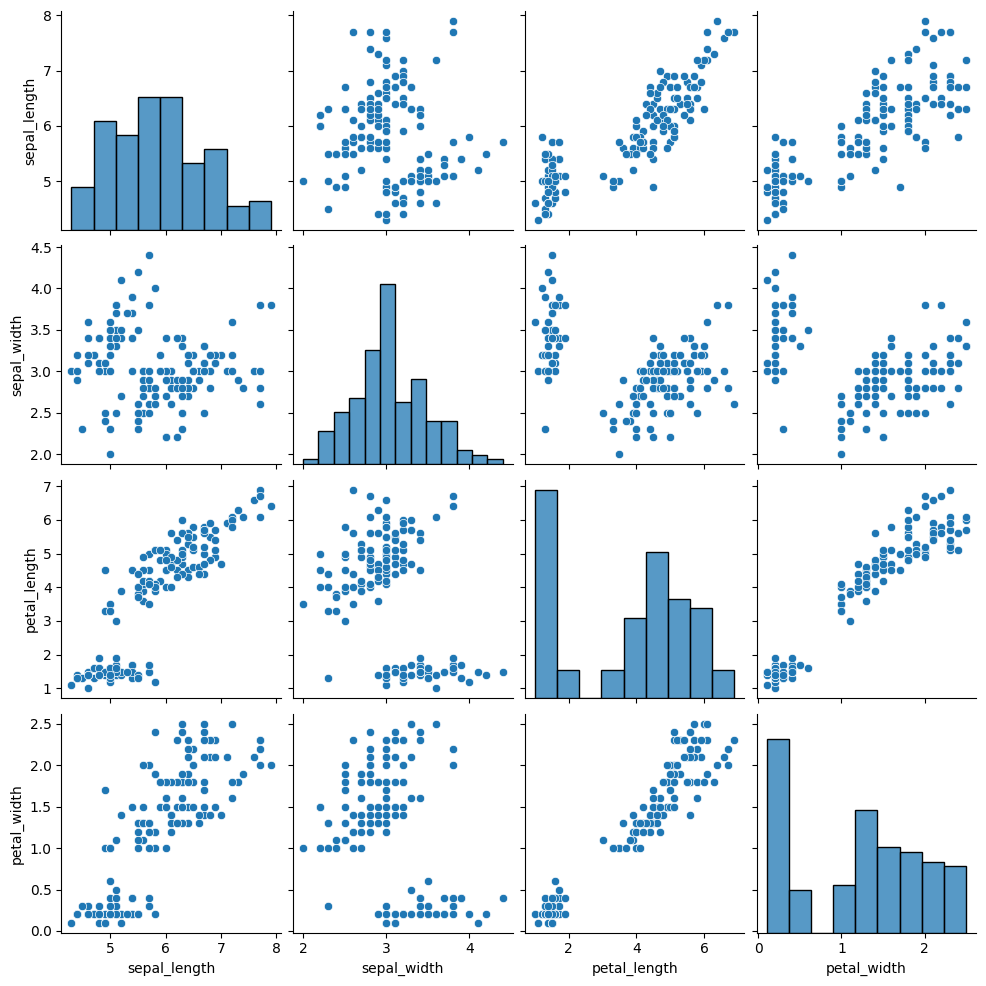

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
data.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
data.isnull().sum()

,0
Unnamed: 0,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
target,0


In [27]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Building

In [29]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
X= data.iloc[:,:-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [32]:
X.shape

(150, 4)

In [34]:
# centroids of the clusters
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [35]:
# Set colours to the clusters to differentiate(Not required in main impelemntation)
color_scheme = np.array(['red','blue','green','yellow','pink','cyan','black'])

In [36]:
color_scheme

array(['red', 'blue', 'green', 'yellow', 'pink', 'cyan', 'black'],
      dtype='<U6')

In [37]:
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


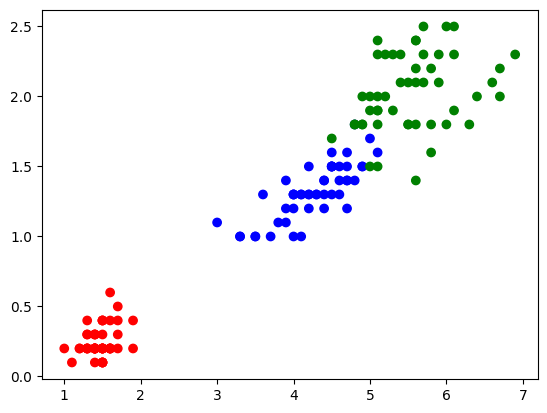

In [58]:
# Visualize the clusters in the original data
plt.scatter(data.petal_length,data.petal_width,color=color_scheme[data.target])
plt.show()

In [39]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [40]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


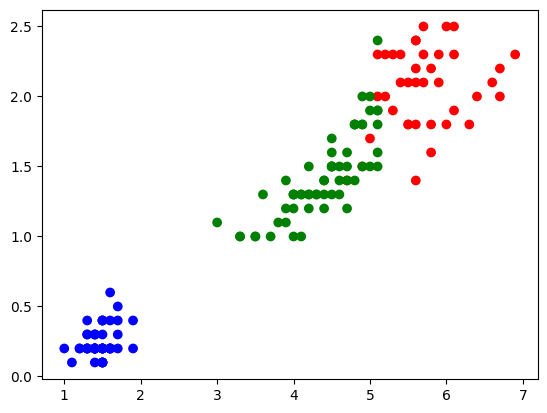

In [41]:
# visualize the clusters formed by the model(Not required in main impelemntation)
plt.scatter(X.petal_length,X.petal_width,color=color_scheme[model.labels_]);

In [42]:
color_scheme

array(['red', 'blue', 'green', 'yellow', 'pink', 'cyan', 'black'],
      dtype='<U6')

In [43]:
# print dataset with the label
# X['Group']= pd.DataFrame(model.labels_)
# X.head(5)

In [44]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
new_point=[[6.4,5.6,5.4,0.8]] # A new observation where it will go
#means which cluster
model.predict(new_point)

array([0], dtype=int32)

In [46]:
type(new_point)

list

# Elbow Technique

### Determine K using elbow method

In [47]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [48]:
for i in range(1,11):
    print(i,wcss[i-1])

1 680.8243999999996
2 152.36870647733915
3 78.94506582597728
4 57.44028021295475
5 46.535582051282034
6 39.251830892636775
7 35.04275995246584
8 30.217021122152712
9 28.7564561965812
10 28.424891802641817


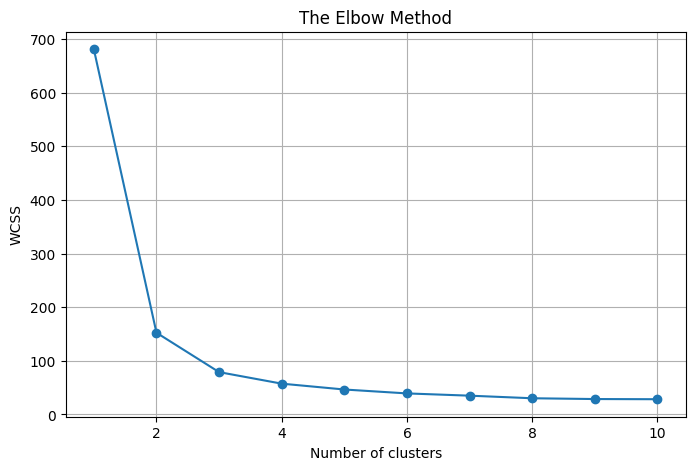

In [56]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker = 'o')
plt.title('The Elbow Method')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
wcss
for i in range(10):
    print(i+1,"  ",wcss[i])

1    680.8243999999996
2    152.36870647733915
3    78.94506582597728
4    57.44028021295475
5    46.535582051282034
6    39.251830892636775
7    35.04275995246584
8    30.217021122152712
9    28.7564561965812
10    28.424891802641817


In [61]:
from sklearn.cluster import KMeans
model_1 = KMeans(n_clusters=3, random_state=42)
X['predict']=model_1.fit_predict(X)

In [62]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


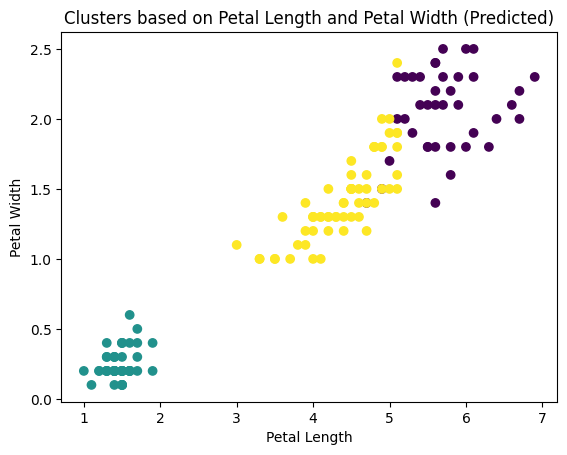

In [64]:
plt.scatter(X.petal_length, X.petal_width, c=X['predict'], cmap='viridis')
plt.title('Clusters based on Petal Length and Petal Width (Predicted)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()